In [79]:
from sklearn.neural_network import MLPRegressor;
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

1150000


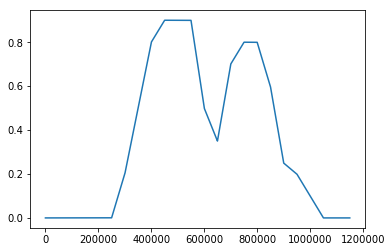

In [129]:
seg = 50000;
x = [[i] for i in range(24)];

y = [0, 0, 0 , 0, 0 , 0, 0.2, 0.5, 0.8, 0.9, 0.9, 0.9, 0.5, 0.35, 0.7, 0.8, 0.8, 0.6, 0.25, 0.2, 0.1, 0.0, 0.0, 0.0]
newx = [];
for i in range(len(x)-1):
    for j in range(seg):
        newxij = x[i][0] + j * (x[i+1][0] - x[i][0])/seg
        newx.append([newxij]);
x = np.array(newx);
mean = np.mean(x);
std = np.std(x);
x = (x- mean)/std;
#order = 8;
#polyTrans = PolynomialFeatures(order);
#x = polyTrans.fit_transform(x);

newy = [];
for i in range(len(y)-1):
    for j in range(seg):
        newyij = y[i] + j * (y[i+1] - y[i])/seg
        newy.append(newyij);
y = np.array(newy);
#mean = np.mean(y);
#std = np.std(y);
#y = (y- mean)/std;
plt.plot(y)
print (len(y))
plt.show()

In [130]:
clf = MLPRegressor(solver='adam', alpha=1e-5,
             hidden_layer_sizes=(3,2), activation = 'logistic', max_iter = 200000);
#clf = linear_model.LinearRegression()
clf.fit(x, y) 

MLPRegressor(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [131]:
ypre = clf.predict(x)

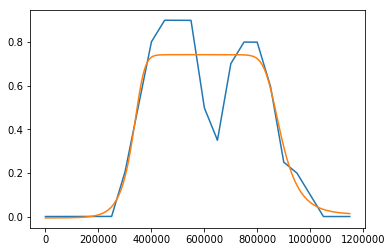

In [132]:
plt.plot(y)
plt.plot(ypre)
plt.show()